In [24]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from matplotlib.lines import Line2D
from reproject import reproject_interp
from astropy.wcs import wcs
import matplotlib.colors as colors

# set up the plot
plt.rcParams['text.usetex'] = False
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["font.family"] = "courier new"
plt.rcParams["font.style"] = "normal"
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.weight"] = 'bold'

In [25]:
f250_file = 'data/test_conv3/f250m_resamp_conv.fits'
f335_file = 'data/test_conv3/f335m_resamp_conv.fits'
f360_file = 'data/test_conv3/f360m_resamp.fits'

f250_hdu = fits.open(f250_file)
f250 = f250_hdu[0].data

f335_hdu = fits.open(f335_file)
f335 = f335_hdu[0].data

f360_hdu = fits.open(f360_file)
f360 = f360_hdu[0].data

Alberto's paper

In [26]:
q = 0.45
R = 0.55
pah_input = np.zeros_like(f360)
i = 0  # iterations
while i < 10:

    c360 = f360 - q * pah_input*(pah_input > 0.)
    c335 = f250 + (c360 - f250) * R
    pah_answer = f335 - c335
    pah_input = pah_answer
    i+=1
    print(i)

# print('mean cont sub:', np.mean(pah_answer))
fits.writeto('data/conv_final/FINAL/f335m_cont_sub.fits', pah_answer, header=f335_hdu[0].header, overwrite=True)
fits.writeto('data/conv_final/FINAL/f335m_cont_only.fits', c335, header=f335_hdu[0].header, overwrite=True)

1
2
3
4
5
6
7
8
9
10


FileNotFoundError: [Errno 2] No such file or directory: 'data/conv_final/FINAL/f335m_cont_sub.fits'

In [ ]:
check = pah_answer + c335
fits.writeto('data/conv_final/FINAL/f335m_cont_plus_sub.fits', check, header=f335_hdu[0].header, overwrite=True)


Lai+20

In [5]:
def C335eq(F250, F360):
    return(0.35*F250 + 0.65*F360)

def PAHeq(F335, C335):
    return(F335 - C335)

c335 = C335eq(f250, f360)
pah_answer = PAHeq(f335, c335)
print(np.mean(c335))

f335_cont_sub_lai = f335 - c335
fits.writeto('data/test_conv/f335_cont_sub_lai20.fits', f335_cont_sub, overwrite=True)
fits.writeto('data/test_conv/f33_cont_only_lai20.fits', c335, overwrite=True)

71.30472217970096


Sandstrom+23

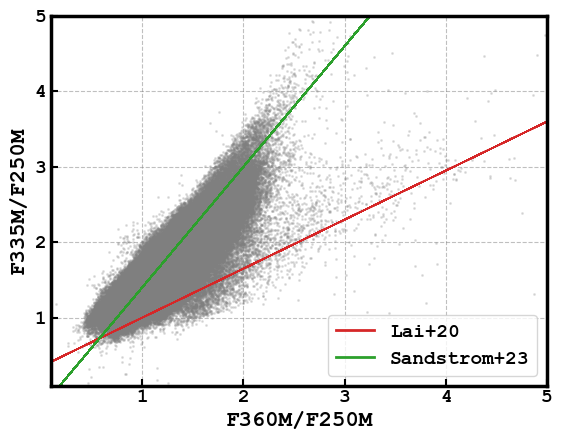

In [6]:
ax = plt.subplot(1,1,1)

x = f360 / f250
y = f335 / f250

ax.scatter(x, y, s=5, marker='.', color='tab:gray',alpha=0.2)
ax.plot(x.flatten(),0.35+(x.flatten())*0.65, ls='-',color='tab:red', lw=1)
ax.plot(x.flatten(),-0.2+(x.flatten())*1.6, ls='-',color='tab:green', lw=1)
ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=14, length=5)
ax.grid(color='gray', ls='--', alpha=0.5)
ax.set_xlim(0.1, 5)
ax.set_ylim(0.1, 5)
ax.set_ylabel('F335M/F250M', fontsize=16)
ax.set_xlabel('F360M/F250M', fontsize=16)

custom_lines = [Line2D([0], [0], color='tab:red', lw=2, ls='-'),
                Line2D([0], [0], color='tab:green', lw=2, ls='-')]
    
plt.legend(custom_lines,['Lai+20','Sandstrom+23', 'this work'], fontsize=14, loc='lower right')
plt.show()

In [11]:
def yc_eq(x_m, y_m):
    
    B_PAH = 1.6
    B_Lai = 0.65
    A_Lai = 0.35
    
    num = B_PAH * x_m - y_m + A_Lai
    denom = B_PAH - B_Lai
    
    return(B_Lai * (num/denom) + A_Lai)

def F335M_cont(yc, F250M):
    return(yc * F250M)

yc = yc_eq(f360/f250, f335/f250)
c335 = F335M_cont(yc, f250)

f335_cont_sub_sandstrom = f335 - c335
fits.writeto('data/test_conv2/shift/f335m_cont_sub_sandstrom23.fits', f335_cont_sub_sandstrom, header=f335_hdu[0].header, overwrite=True)
fits.writeto('data/test_conv2/shift/f335m_cont_only_sandstrom23.fits', c335, header=f335_hdu[0].header, overwrite=True)

### Let's compare Sandstrom+23 and our method. Using files from data/test_conv2/shift/ where we manually shift the CRPIX to match the filter F360m. Default relaxation parameter r = 1e-4 from pypher. Pixscale of 0.008.

In [3]:
f250_file = 'data/test_conv2/shift/f250m_resamp_conv.fits'
f335_file = 'data/test_conv2/shift/f335m_resamp_conv.fits'
f360_file = 'data/test_conv2/shift/f360m_resamp.fits'
pah_file = 'data/test_conv2/shift/f335m_cont_sub.fits'
f335_cont_file = 'data/test_conv2/shift/f335m_cont_only.fits'

pah_file_sandstrom23 = 'data/test_conv2/shift/f335m_cont_sub_sandstrom23.fits'
f335_cont_file_sandstrom23 = 'data/test_conv2/shift/f335m_cont_only_sandstrom23.fits'

f250_hdu = fits.open(f250_file)
f250 = f250_hdu[0].data

f335_hdu = fits.open(f335_file)
f335 = f335_hdu[0].data

f360_hdu = fits.open(f360_file)
f360 = f360_hdu[0].data

pah_hdu = fits.open(pah_file)
pah = pah_hdu[0].data

f335_cont_hdu = fits.open(f335_cont_file)
f335_cont = f335_cont_hdu[0].data

pah_hdu_sandstrom23 = fits.open(pah_file_sandstrom23)
pah_sandstrom23 = pah_hdu_sandstrom23[0].data

f335_cont_hdu_sandstrom23 = fits.open(f335_cont_file_sandstrom23)
f335_cont_sandstrom23 = f335_cont_hdu_sandstrom23[0].data

og_f335_file = 'data/jw01701052001_nircam_sub640_f335m_jhat_i2d.fits'
og_f335_hdu = fits.open(og_f335_file)
og_f335 = og_f335_hdu[1].data

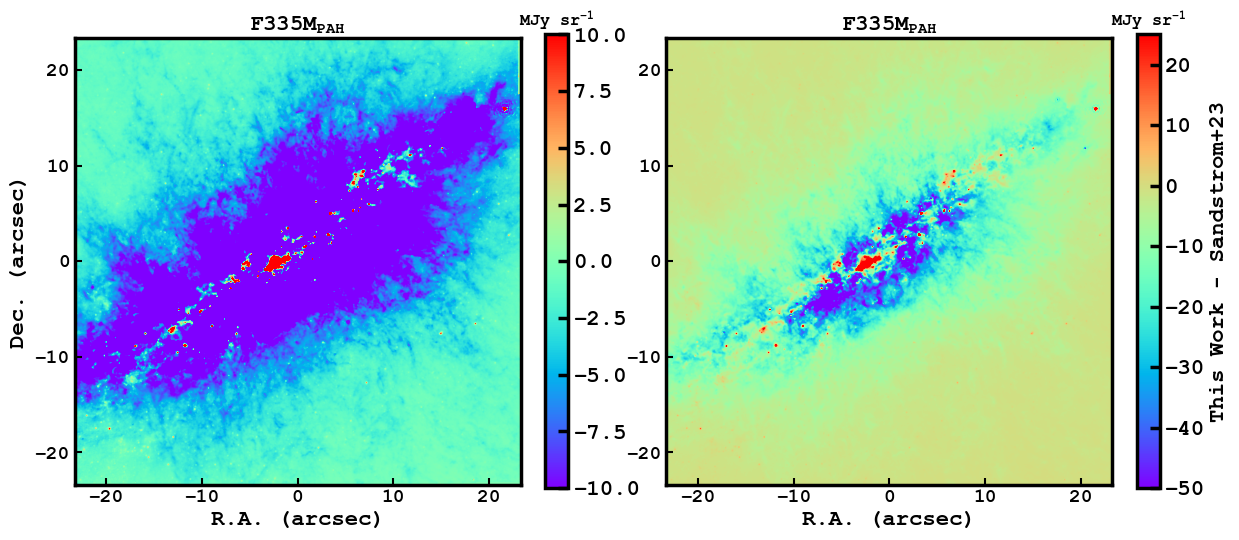

In [98]:
pixscale = 0.008
y,x = f335_hdu[0].shape  # assuming x and y are the same dimensions
axis_lower_x = -(x*pixscale)/2
axis_upper_x = (x*pixscale)/2 
axis_lower_y = -(y*pixscale)/2
axis_upper_y = (y*pixscale)/2

fig = plt.figure(figsize=(14,6))

vmin = -10
vmax = 10

# ax = plt.subplot(1,2,1, projection=WCS(og_f335_hdu[1].header))
ax = plt.subplot(1,2,1)
pah_diff = pah - pah_sandstrom23
im = ax.imshow(pah_diff, cmap='rainbow', origin='lower', vmin=vmin, vmax=vmax, extent=[axis_lower_x,axis_upper_x, axis_lower_y,axis_upper_y])
bar = plt.colorbar(im, fraction=0.046)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')
bar.ax.set_title('MJy sr$^{-1}$')
ax.set_title('F335M$_{PAH}$', fontsize=16)

ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=14, length=5)
ax.set_xlabel('R.A. (arcsec)', fontsize=16)
ax.set_ylabel('Dec. (arcsec)', fontsize=16)

vmin = -50
vmax = 25

ax = plt.subplot(1,2,2)
im = ax.imshow(pah_diff, cmap='rainbow', origin='lower', vmin=vmin, vmax=vmax, extent=[axis_lower_x,axis_upper_x, axis_lower_y,axis_upper_y])
bar = plt.colorbar(im, fraction=0.046)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')
bar.ax.set_title('MJy sr$^{-1}$')
bar.set_label('This Work - Sandstrom+23', fontsize=16)
ax.set_title('F335M$_{PAH}$', fontsize=16)

ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=14, length=5)
ax.set_xlabel('R.A. (arcsec)', fontsize=16)

# ax = plt.subplot(1,2,2, projection=wcs.WCS(f335_cont_hdu[0].header))
# ax = plt.subplot(1,2,2)
# cont_diff = f335_cont - f335_cont_sandstrom23
# im = ax.imshow(cont_diff, cmap='rainbow', origin='lower', vmin=vmin, vmax=vmax, extent=[axis_lower_x,axis_upper_x, axis_lower_y,axis_upper_y])
# bar = plt.colorbar(im, fraction=0.046)
# bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')
# bar.set_label('This Work - Sandstrom+23', fontsize=16)
# bar.ax.set_title('MJy sr$^{-1}$')
# ax.set_title('F335M$_{cont}$', fontsize=16)

# ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=14, length=5)
# ax.set_xlabel('R.A. (arcsec)', fontsize=16)

plt.show()

In [72]:
# make the image a square; cut the y-axis down
pah_copy = pah.copy()
pah_square = pah_copy[:pah.shape[1],:]

pah_sandstrom23_copy = pah_sandstrom23.copy()
pah_sandstrom23_square = pah_sandstrom23_copy[:pah_sandstrom23.shape[1],:]

xs = np.arange(pah_square.shape[1])
ys = np.arange(pah_square.shape[0])
x_cen = pah.shape[1] // 2
y_cen = pah.shape[0] // 2

step = 100
r_ins = np.arange(0, x_cen, step)

pah_vals = []
pah_sandstrom23_vals = []

for r_in in r_ins:
    r_out = r_in+step
    
    mask = (((xs-x_cen)**2 + (ys-y_cen)**2 <= r_out**2) &
           ((xs-x_cen)**2 + (ys-y_cen)**2 >= r_in**2))
    
    avg_pah = np.mean(pah_square[mask])
    avg_pah_sandstrom23 = np.mean(pah_sandstrom23_square[mask])
    
    pah_vals.append(avg_pah)
    pah_sandstrom23_vals.append(avg_pah_sandstrom23)

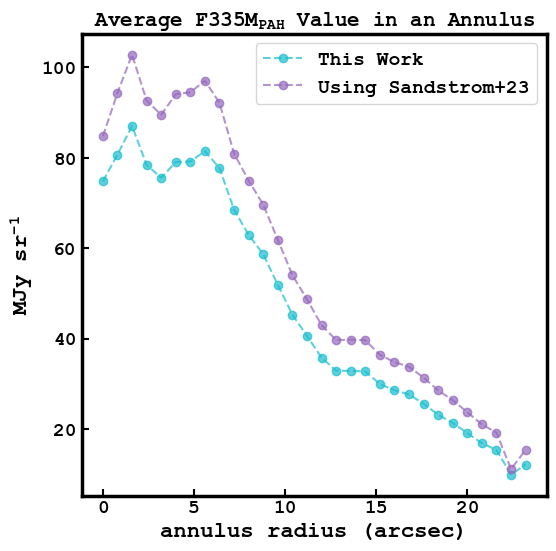

In [94]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

ax.plot(r_ins * pixscale, pah_vals, 'o--', color='tab:cyan', alpha=0.7, label='This Work')
ax.plot(r_ins * pixscale, pah_sandstrom23_vals, 'o--', color='tab:purple', alpha=0.7, label='Using Sandstrom+23')
ax.set_title('Average F335M$_{PAH}$ Value in an Annulus', fontsize=15)
ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=14, length=5)
ax.set_xlabel('annulus radius (arcsec)', fontsize=16)
ax.set_ylabel('MJy sr$^{-1}$', fontsize=16)

plt.legend(fontsize=14)
plt.show()

In [22]:
f335_og_file = 'data/jw01701052001_nircam_sub640_f335m_jhat_i2d.fits'
f335_og_hdu = fits.open(f335_og_file)
f335_og = f335_og_hdu[1].data

f335_resamp_file = 'data/conv_final/f335m_resamp.fits'
f335_resamp_hdu = fits.open(f335_resamp_file)
f335_resamp = f335_resamp_hdu[0].data

f335_resamp_conv_file = 'data/conv_final/f335m_resamp_conv.fits'
f335_resamp_conv_hdu = fits.open(f335_resamp_conv_file)
f335_resamp_conv = f335_resamp_conv_hdu[0].data

In [24]:
print(np.sum(f335_og), np.sum(f335_resamp[np.isfinite(f335_resamp)]), np.sum(f335_resamp_conv))

119771976.0 3300827242.263389 3300337453.2205014


In [21]:
np.sum(f335) / np.sum(f335_og)

27.555172448858166

In [20]:
np.sum(f335_og)

119771976.0